# AST 208 Lab 9: Exoplanet Radial Velocities

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i>
\
**Cesarine Graham** 
\
**04/06/2023**
\
**Team Name:** Table 69
\
**Colllaborators:** Sam Monique, Max Verboncoeur, Allison Chevis

In [1]:
# Run this cell first to load the numpy and matplotlib.pyplot modules
import numpy as np
# load graphics
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import scipy

## Introduction 
In this lab, you will be using radial velocity data on the planets you studied in Lab 9. Optical spectra were obtained to complement the Kepler photometry, and radial velocities were measured from the Doppler shift of lines in these spectra. By combining these data with the measurements you made last week, you will determine the planets' masses and probable compositions.

There are the same 4 planets: A, B, C, and D. For each planet, there is a file with `_rv` in the name. This file contains measurements of the star's projected velocity as a function of time. Today you will analyze the same planet as you did last week. As you did last week, your team will then tabulate your results. 

Make sure to include the details of your calculations in this notebook and use $\mathrm{\LaTeX}$ to typeset the mathematics.

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 1) Like last week, I am analyzing planet **?**.

<span style="color:red">(1 pt)</span>

<span style="color:seagreen"> 
    
#### TESSC


## Planet TESS_C



<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 2) Load the planet's radial velocity and plot it, with errorbars, as a function of BJD.  

<span style="color:red">5 points</span>

In [2]:
#load data in from text file
data = np.genfromtxt('TESSC_rv.dat')

#arrays for each column
BJD = data[:,0]
Radial_Velocity = data[:,1]
RV_Uncertainty = data[:,2]

#making a time array
t = BJD - BJD[0]

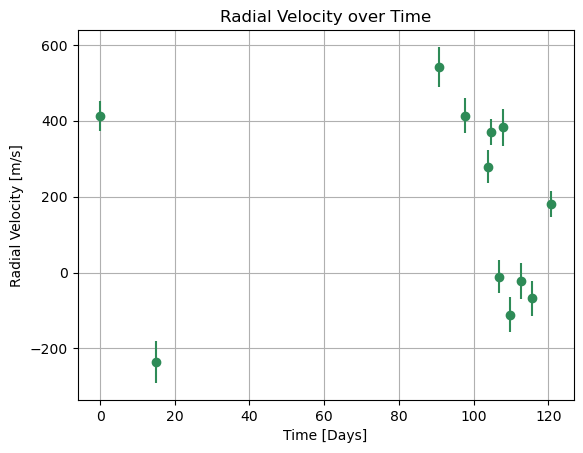

In [3]:
#mkaing the scatter plot with error bars
plt.errorbar(t,Radial_Velocity,yerr=RV_Uncertainty,linestyle='none',marker='o', color='seagreen')
plt.xlabel("Time [Days]")
plt.ylabel("Radial Velocity [m/s]")
plt.title("Radial Velocity over Time")
plt.grid()

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 3) Does the radial velocity appear as a sinusoidal curve? How often is the radial velocity sampled, compared with the period?

<span style="color:red">2 points total</span>


<span style="color:seagreen"> 
    
#### It does not appear as a sinusoidal curve. There is more data analysis that needs to take place before this pattern will appear. The radial velocity is sampled approximately every 2-3 days, with the exception of the roughly 70 days that nothing was recorded.

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 4) Fold the radial velocity data using the period you determined from the transits. After taking the remainder, divide by the period $P$ so that the horizontal axis runs from 0 to 1, rather than from 0 to $P$. Our new $x$-axis coordinate is the phase $\phi$. Also plot error bars!!

<span style="color:red">2 points total</span>

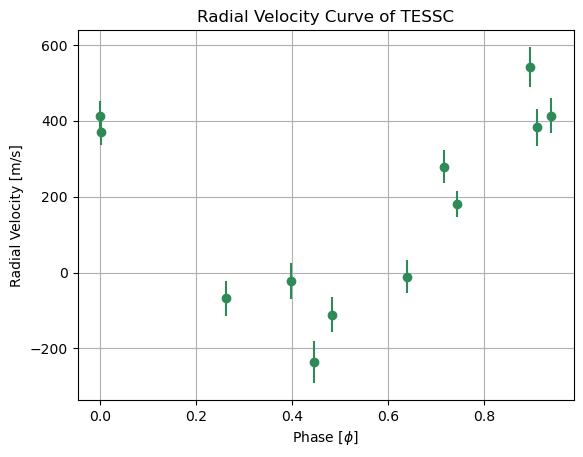

In [4]:
t_fold = np.remainder(t,3.3774) / 3.3774
plt.errorbar(t_fold, Radial_Velocity,yerr=RV_Uncertainty,linestyle='none',marker='o', color='seagreen')
plt.xlabel("Phase [$\phi$]")
plt.ylabel("Radial Velocity [m/s]")
plt.title("Radial Velocity Curve of TESSC")
plt.grid()

<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 5) Fit a sinusoid of the form
\begin{equation}
v(\phi) = v_0 + K\sin\left[2\pi\left(\phi + \phi_0\right)\right]
\end{equation}

to the folded radial velocities.  Here $\phi$ is the phase (recall the limits on $\phi$). The velocity offset $v_0$, semi-amplitude $K$, and starting phase $\phi_0$ are adjustable parameters---you should vary their values until you find a $v(\phi)$ that best fits the data.

<span style="color:red">6 points total</span>

<ErrorbarContainer object of 3 artists>

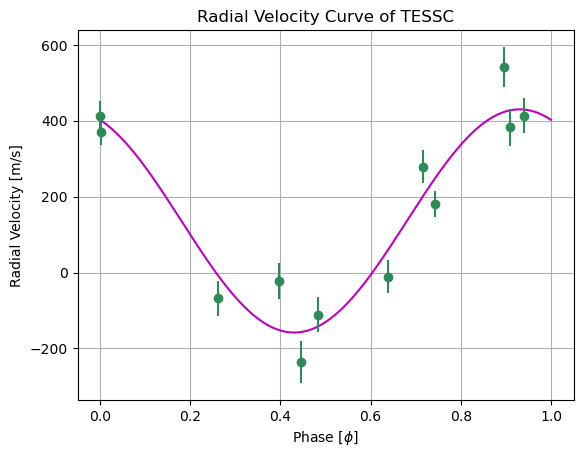

In [5]:
phi = np.arange(0, 1, 0.0001)

#turning a sine curve fit into a function
def fit(phi, v0, K, phi_0):
    return v0 + K*np.sin((2*np.pi)*(phi+phi_0))

para,cov = curve_fit(fit,t_fold,Radial_Velocity)
RV_fit = fit(phi,para[0],para[1],para[2])

plt.xlabel("Phase [$\phi$]")
plt.ylabel("Radial Velocity [m/s]")
plt.title("Radial Velocity Curve of TESSC")
plt.grid()
plt.plot(phi, RV_fit, color = 'm')

plt.errorbar(t_fold, Radial_Velocity,yerr=RV_Uncertainty,linestyle='none',marker='o', color='seagreen')

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 6) Assess how well the folded data are fit with a sinusoidal function, given the error bars on your radial velocity measurements. Estimate the uncertainty on your measurement of $K$ by tweaking the parameters of the sinusoid fit in #5. Explain your reasoning of how you estimated the uncertainty (feel free to show a plot!).

<span style="color:red">2 points for a reasonable answer</span>

<ErrorbarContainer object of 3 artists>

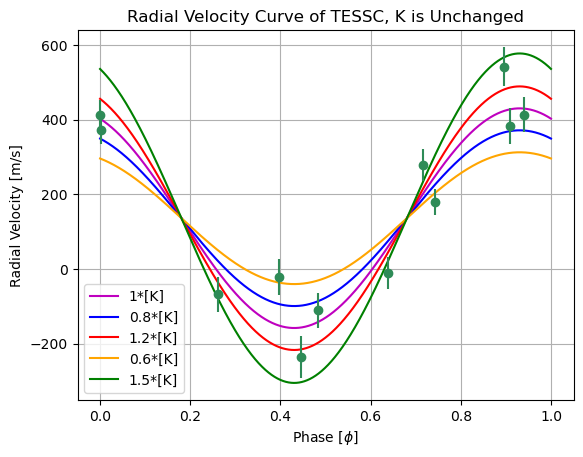

In [6]:
plt.grid()
plt.xlabel("Phase [$\phi$]")
plt.ylabel("Radial Velocity [m/s]")
plt.title("Radial Velocity Curve of TESSC, K is Unchanged")
plt.plot(phi, RV_fit, color = 'm', label = "1*[K]")
plt.plot(phi, fit(phi,para[0],0.8*para[1],para[2]), color = 'b', label = "0.8*[K]")
plt.plot(phi, fit(phi,para[0],1.2*para[1],para[2]), color = 'r', label = "1.2*[K]")
plt.plot(phi, fit(phi,para[0],0.6*para[1],para[2]), color = 'orange', label = "0.6*[K]")
plt.plot(phi, fit(phi,para[0],1.5*para[1],para[2]), color = 'green', label = "1.5*[K]")


plt.legend()

plt.errorbar(t_fold, Radial_Velocity,yerr=RV_Uncertainty,linestyle='none',marker='o', color='seagreen')

<span style="color:seagreen"> 
    
#### The folded data fits very well with the sinusoidal function since we used the curve_fit module to fit a sine curve to the data. Looking at the above graph, the uncertainty of K is within $\pm 0.2$ magnitude, or $\pm 58.8$ (m/s).

## Planet properties 

### Physical properties
To understand the planet, we must first have good measurements of the host star properties. Here is a synopsis of stellar properties of the *TESS* targets. 

<table style="border:none; width: 500px">
<tr style="border:none; border-bottom:1px solid #ddd">
<th style="border:none">system</th><th style="border:none">surface temperautre (K)</th>
<th style="border:none">radius ($R_\odot$)</th><th style="border:none">mass ($M_\odot$)</th>
<th style="border:none">reference</th>
</tr>
<tr style="border:none">
<td style="border:none">TESS A</td><td style="border:none">$6460\pm150$</td>
<td style="border:none">$2.082\pm0.07$</td><td style="border:none">$1.536\pm0.07$</td>
<td style="border:none">Rodriguez et al. (2021)</td>
</tr>
<tr style="border:none">
<td style="border:none">TESS B</td><td style="border:none">$6274\pm97$</td>
<td style="border:none">$1.925\pm0.065$</td><td style="border:none">$1.464\pm0.08$</td>
<td style="border:none">Rodriguez et al. (2021)</td>
</tr>
<tr style="border:none">
<td style="border:none">TESS C</td><td style="border:none">$6630\pm300$</td>
<td style="border:none">$1.612\pm0.057$</td><td style="border:none">$1.516\pm0.09$</td>
<td style="border:none">Rodriguez et al. (2023)</td>
</tr>
<tr style="border:none">
<td style="border:none">TESS D</td><td style="border:none">$6280\pm160$</td>
<td style="border:none">$1.396\pm0.05$</td><td style="border:none">$1.233\pm0.09$</td>
<td style="border:none">Rodriguez et al. (2023)</td>
</tr>
</table>

**From Lab 8:**

| planet | orbital separation (AU) | planet radius ($R_\mathrm{J}$) | surface temperature (K)|
|--------|-------------------------|-------------------------|-------------------------|
|    A   | $0.0661\pm0.0011$         | $1.812\pm0.133$           | $1539\pm44$            |                       
|    B   | $0.0626\pm0.0012$         | $1.427\pm0.137$           | $1476\pm36$             |                       
|    C   | $0.0506\pm0.0011$         | $1.309\pm0.108$           | $1587\pm79$             |                       
|    D   | $0.0513\pm0.0013$         | $1.486\pm0.084$           | $1390\pm50$             |                       


<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 7) Find the minimum inclination for your planet, and verify that taking $\sin i = 1$ is a valid approximation.

<span style="color:red">3 points total</span>

 $$i_{min}= \cos^{-1}\left(\frac{R_s + R_p}{a} \right )$$ where $R_s$ is the radius of the star, $R_p$ is the radius of the planet, and $a$ is the semi-major axis. All of these quantities need to be in the same units!


In [7]:
# minimum inclination

Rs = 15.686628
Rp = 1.309
a = 105.881109

i_min = np.arccos((Rs + Rp)/(a))
print("the minimum inclination for TESSC is:", i_min, "radians.")

np.sin(i_min)
print("sin i = 1 is a valid approximation since sin(i_min) = ", np.sin(i_min))

the minimum inclination for TESSC is: 1.4095827650769603 radians.
sin i = 1 is a valid approximation since sin(i_min) =  0.9870332139860287


<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 8) Use the projected orbital velocity $K$, the period $P$, and the stellar mass $M_s$ to determine the mass for your planet.  Report your mass in units of Jupiter's mass $M_\mathrm{J}$, and include the uncertainty in this value. In performing this calculation you may assume that $M_p \ll M_s$, that the orbit is circular, and that $\sin i = 1$. After computing $M_p$, verify that the assumption $M_p \ll M_s$ holds. Compare your planet's mass with Jupiter, Neptune, and/or Earth.

<span style="color:red">3 points total</span>

In [16]:
# planet mass

G = scipy.constants.G
M_s = 1.516 * 1.989e30
P = 3.3774 * 24 * 3600
K = abs(para[1])

Mp = K /(((2*np.pi*G)/(P*(M_s**2)))**(1/3))
M_p = Mp * 1.899e-27 
print("the mass of the planet is ", M_p, "Jupiter mass. The uncertainty is 19.992%, or +/- 2.07 MJ.")
print("the star's mass is 1588.119 Jupiter mass and the planets mass is 10.33 Jupiter mass, so Mp<<Ms holds.")
print("Exoplanet: 10.33 MJ. Neptune: 0.0539 MJ. Earth: 0.00315 MJ. Jupiter: 1 MJ.")

the mass of the planet is  10.330156293874325 Jupiter mass. The uncertainty is 19.992%, or +/- 2.07 MJ.
the star's mass is 1588.119 Jupiter mass and the planets mass is 10.33 Jupiter mass, so Mp<<Ms holds.
Exoplanet: 10.33 MJ. Neptune: 0.0539 MJ. Earth: 0.00315 MJ. Jupiter: 1 MJ.


<i class="fa fa-cogs" style="font-size:1.5em; color:red"></i> 9) For all four planets, combine the planet mass with the planet radii you measured in Lab 8 (table above) to estimate their densities. What are the densities of Jupiter, Neptune, and Earth, and how do the *Kepler* planets compare? 

<span style="color:red">4 points total</span>

In [14]:
# planet density

planet_a_density = 0.89 / ((4/3)*np.pi*(1.812)**3)
print("the density of planet a is: ", planet_a_density, "Jupiter density")
planet_b_density = 2.35 / ((4/3)*np.pi*(1.427)**3)
print("the density of planet b is: ", planet_b_density, "Jupiter density")
planet_c_density = 10.33 / ((4/3)*np.pi*(1.309)**3)
print("the density of planet c is: ", planet_c_density, "Jupiter density")
planet_d_density = 0.994 / ((4/3)*np.pi*(1.486)**3)
print("the density of planet d is: ", planet_d_density, "Jupiter density")
print("")
print("the density of Jupiter is: 1.0 Jupiter density")
print("the density of Neptune is: 1.231 Jupiter density")
print("the density of Earth is: 4.231 Jupiter density")
print("")
print("the Kepler planets are much less dense than that of Earth, and only planet C is close to the density of Jupiter")

the density of planet a is:  0.03571303976300934 Jupiter density
the density of planet b is:  0.19306668229532295 Jupiter density
the density of planet c is:  1.0994937691889766 Jupiter density
the density of planet d is:  0.07231715740145338 Jupiter density

the density of Jupiter is: 1.0 Jupiter density
the density of Neptune is: 1.231 Jupiter density
the density of Earth is: 4.231 Jupiter density

the Kepler planets are much less dense than that of Earth, and only planet C is close to the density of Jupiter


<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 10) Compare your planets against those from [Fulton et al. (2015](https://ui.adsabs.harvard.edu/#abs/2015ApJ...810...30F/abstract); their Figure 12), shown below. The blue curves are theoretical calculations of the mass-radius relation for different compositions from [Seager et al. (2007)](https://ui.adsabs.harvard.edu/#abs/2007ApJ...669.1279S/abstract). The green triangles represent solar system planets, while the red circles are exoplanets detected with *Kepler*. Give the most likely composition for your planet.


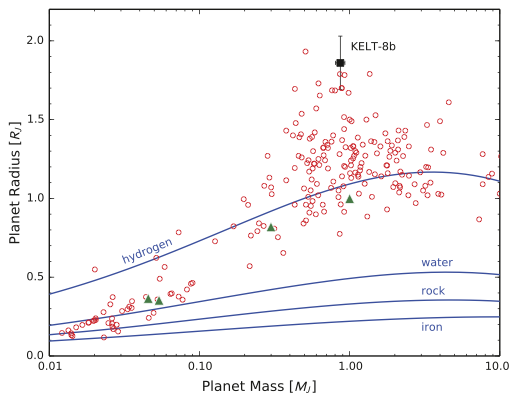

<span style="color:red">2 points total</span>

<span style="color:seagreen"> 
    
#### Planet A: Hydrogen
#### Planet B: Hydrogen
#### Planet C: Hydrogen 
#### Planet D: Hydrogen

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> 11) Consider the plot below, which plots the planet mass against orbital period for all confirmed exoplanets to date. Consider the planets discovered through the radial velocity method (red points) and the transit method (green points).  Explain the selection effects shaping where these planets fall in this plot. In what regions of the plot do these methods effectively find planets? What kinds of planets are currently missing from our samples, and why do our methods struggle to find them? Why are the green (transit) points differently distributed than the red (radial velocity) points?

![Exoplanet masses vs. period](exo_massperiod.png "exo_massperiod.png")

<span style="color:red">8 points</span>

<span style="color:seagreen"> 
        
#### According to the plot, we can effectively find planets via Radial Velocity and Transits. Planets found through these two particular methods are typically the same mass and period due to observaitonal biases. The transit method is most sensitive to planets that are close to their host stars and have relatively short orbital periods, resulting in the discovery of planets that are similar to Earth in mass with very short periods. The radial velocity method, however, is most sensitive to massive planets that are close to their host stars and have relatively short orbital periods, reuslting in the discovery of planets that are similiar to Jupiter in mass and have orbital periods of around a few years. This is also the cause of the unusual distrubtion of the planets on the plot.
    
#### Out of the 7 methods plotted, Astrometry and Orbital Brightness Modulation struggle the most to find exoplanets. For both of these methods, it is absolutely necessary that high-precision equipment is used to detect the slightest changes in the star's wobble (astrometry) and the star's brightness (orbital brightness modulation). 

<i class="fa fa-pencil" style="font-size:1.5em; color:red"></i> EC:) Why are transiting planets more valuable in terms of atmospheric characterization? Provide a few sentences to a paragraph.

<span style="color:red">2 points</span>

<span style="color:seagreen"> 
    
#### Transiting planets are more valuable in terms of atmospheric characcterization because we can gain much more information about their systems. This technique can meansure the inclination of the planet's orbit relative to us, and thus allowing us to calculate the planet's true mass. In addition to this bit of information, when the planet transits its host star, the light that passes through its atmosphere can be extracted analyzed via spectroscopy. Through spectroscopy, we can determine the planet's atmosphere and chemical composition. Even better, when transiting planets pass behind their host stars, we can measure the thermal emmisions of the planet via infrared wavelengths.